In [1]:
import matplotlib.pyplot as plt
import csv
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

phy_train=pd.read_csv('PHY_TRAIN.csv')
phy_train



,exampleid,target,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,...,feat69,feat70,feat71,feat72,feat73,feat74,feat75,feat76,feat77,feat78
0,1,0,0.000000,0.000000,0.000000,0,0.000000,0.0,0.000000,0,...,-1,-0.036906,-0.000724,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
1,2,0,0.920167,0.817883,-0.646473,-1,0.000000,0.0,0.000000,0,...,-1,-0.999927,-0.012102,0.920167,0.817883,-0.646473,-1,1,0.302235,0.950770
2,3,1,0.868397,0.178202,0.150828,-1,0.000000,0.0,0.000000,0,...,1,0.908824,0.550843,0.868397,0.178202,0.150828,-1,1,0.001421,0.882853
3,4,0,0.000000,0.000000,0.000000,0,1.577894,0.0,-0.369792,-1,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
4,5,0,0.000000,0.000000,0.000000,0,0.000000,0.0,0.000000,0,...,1,0.000005,0.400702,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,0,0.000000,0.000000,0.000000,0,0.000000,0.0,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
49996,49997,1,0.000000,0.000000,0.000000,0,0.000000,0.0,0.000000,0,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
49997,49998,1,0.918590,1.012605,-0.047045,-1,0.000000,0.0,0.000000,0,...,0,0.000000,0.000000,0.918590,1.012605,-0.047045,-1,1,0.014583,0.850662
49998,49999,1,0.000000,0.000000,0.000000,0,0.855551,0.0,-0.849437,1,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000


In [36]:

null_columns=phy_train.columns[phy_train.isnull().any()]
print(phy_train[phy_train.isnull().any(axis=1)][null_columns])

         feat20    feat21    feat22  feat29    feat44    feat45    feat46  \
0           NaN       NaN       NaN     NaN  0.876238  0.893958 -0.090240   
1     -0.920167  0.950770 -0.992265     NaN       NaN       NaN       NaN   
2      0.773496 -0.620884 -0.489853     NaN  0.773496  0.620884 -0.591282   
3           NaN       NaN       NaN     0.0  0.000000  0.000000  0.000000   
4           NaN       NaN       NaN     NaN       NaN       NaN       NaN   
...         ...       ...       ...     ...       ...       ...       ...   
49993       NaN       NaN       NaN     0.0  0.000000  0.000000  0.000000   
49995       NaN       NaN       NaN     0.0  0.000000  0.000000  0.000000   
49996       NaN       NaN       NaN     0.0  0.000000  0.000000  0.000000   
49998       NaN       NaN       NaN     0.0  0.000000  0.000000  0.000000   
49999       NaN       NaN       NaN     0.0  0.000000  0.000000  0.000000   

       feat55  
0         NaN  
1         NaN  
2         NaN  
3         0

In [3]:
# null_columns=phy_train.columns[phy_train.isnull().any()]
# print(phy_train[phy_train.isnull().any(axis=1)][null_columns].head())
# phy_train[null_columns].fillna(0)
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN, strategy='mean')
idf=pd.DataFrame(imp.fit_transform(phy_train))



In [4]:
idf.columns=phy_train.columns
idf.index=phy_train.index
null_columns=idf.columns[idf.isnull().any()]
null_columns

Index([], dtype='object')

In [37]:
X=idf.iloc[:,2:]
y=idf.target

# introduce interaction terms
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, interaction_only=True).fit_transform(X)
X= poly


In [38]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)




In [39]:
X.reshape(-1, 1) 

model = LogisticRegression(solver='liblinear', random_state=42)

model.fit(X,y)

C:\Users\Chris\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_pred=model.predict(X_test)

True Positive Rate:  0.6694779116465863
False Positive Rate:  0.3362549800796813
Accuracy: 0.6666
Precision: 0.6637450199203188
Recall: 0.6693451185214946


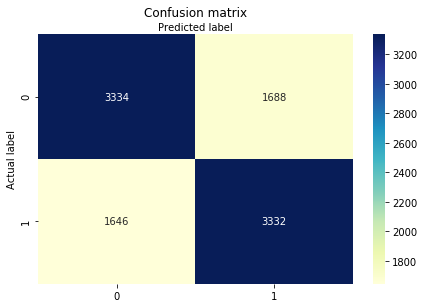

In [41]:
from sklearn import metrics
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

TP = cnf_matrix[0][0]
FP = cnf_matrix[0][1]
FN = cnf_matrix[1][0]
TN = cnf_matrix[1][1]

TPR = TP/(TP+FN)
FPR = FP/(FP+TN)

print("True Positive Rate: ",TPR)
print("False Positive Rate: ", FPR)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


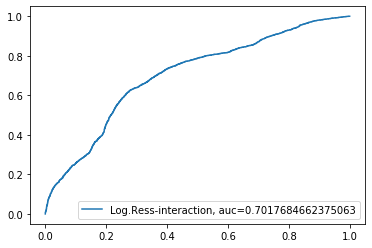

In [42]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Log.Ress-interaction, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [46]:


from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.3334
Mean Squared Error: 0.3334
Root Mean Squared Error: 0.577408001330082


In [43]:
phy_train.describe()


,exampleid,target,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,...,feat69,feat70,feat71,feat72,feat73,feat74,feat75,feat76,feat77,feat78
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,0.497220,0.155606,0.084876,-0.050354,-0.000060,0.126569,0.049887,-0.038344,0.002860,...,0.008120,0.000478,0.003198,0.052807,0.066944,-0.014101,-0.001460,0.094480,0.002843,0.066545
std,14433.901067,0.499997,0.414875,0.295335,0.253748,0.392916,0.400694,0.223713,0.214168,0.322077,...,0.769302,0.446978,0.381329,0.180710,0.283114,0.176896,0.295939,0.315841,0.019081,0.223091
min,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,...,-1.000000,-0.999998,-0.908001,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000
25%,12500.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.000013,-0.001582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25000.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37500.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000015,0.003002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,50000.000000,1.000000,2.639020,3.429590,0.999954,1.000000,2.719006,3.054644,0.999274,1.000000,...,1.000000,0.999999,0.907744,0.999953,3.429590,0.999869,1.000000,3.000000,0.385513,1.000000


In [44]:
print(phy_train.skew())

exampleid   -2.411087e-17
target       1.112051e-02
feat1        2.826244e+00
feat2        4.424666e+00
feat3       -1.562475e+00
                 ...     
feat74      -1.419218e+00
feat75      -4.153340e-02
feat76       3.464927e+00
feat77       1.211273e+01
feat78       3.223882e+00
Length: 80, dtype: float64


In [45]:
stdev = np.sqrt(sum((model.predict(X_train) - y_train)**2) / (len(y_train) - 2))

stdev

0.5724870191273803